In [119]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [135]:
# Import data
df   = pd.read_csv('https://raw.githubusercontent.com/NUELBUNDI/Machine-Learning-Data-Set/main/insurance%20Regression.csv')          # For Regression

df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


#### Linear Regression

##### Data Preparation


In [136]:
# Lets use Pipelines for our data preprocessing

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# Separate features and target variables

X = df.drop('charges',axis=1)
y = df['charges']

# Categorical and numerical columns
categorical_features = ['sex', 'smoker', 'region']
numerical_features   = ['age', 'bmi', 'children']



# Preprocessing pipelines for numerical and categorical data

numerical_pipeline = Pipeline([
                                ('imputer', SimpleImputer(strategy='mean')),
                                    ('scaler', StandardScaler())
                                ])


categorical_pipeline = Pipeline([
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ])


# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
                                    ('num', numerical_pipeline, numerical_features),
                                    ('cat', categorical_pipeline, categorical_features)
                                ])


# Final pipeline including the preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [137]:
# Fit and transform the data
X_transformed = pipeline.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [222]:
# Lets Train a Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


lr_model = LinearRegression()  # Create an instance
lr_model.fit(X_train, y_train) # Train
y_pred   = lr_model.predict(X_test) 

print("Coefficients:\n", lr_model.coef_)
print("Intercept:", lr_model.intercept_)
print("Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Coefficients:
 [ 3.60914902e+03  2.05488506e+03  5.12478869e+02  9.29584582e+00
 -9.29584582e+00 -1.18255644e+04  1.18255644e+04  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02]
Intercept: 20302.765320157294
Mean Squared Error: 5796.2846592762735
R^2 Score: 0.7835929767120723


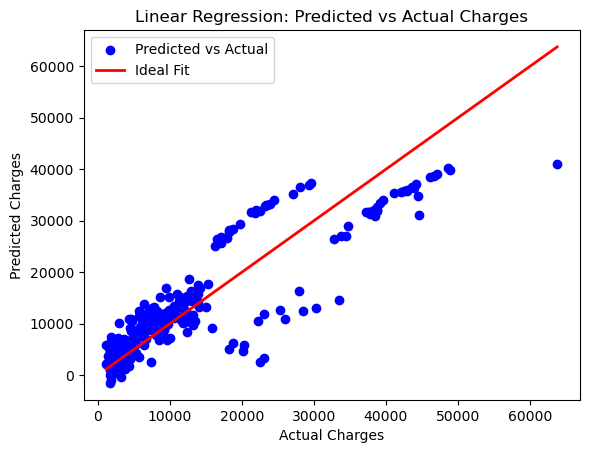

In [174]:
# Visualization

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')

plt.title('Linear Regression: Predicted vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

##### Stochastic Gradient Descent Implementation from scratch and predict 

- SGD is an optimization technique that helps in minimizing the error (or cost) in predicting the output y from the input features X

In [202]:
# Stochastic Gradient Descent Implementation


def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=100):
    
    m     =   len(X)                           # m is the number of data points
    X_b   = np.c_[np.ones((m, 1)), X]          # Add x0 = 1 to each instance , this is  bias Term (Intercept)
    theta = np.random.randn(X_b.shape[1], 1)   # Random initialization of weights Theta represent model parameters(weights) which will be optimized during training
    
    for iteration in range(n_iterations):
        '''
        optimization loop that runs for a total of n_iterations meaning it goes the entire dataset multiple times
        to adjust the weights and minimize error
        '''
        
        for i in range(m):
            
            random_index   = np.random.randint(m)                # Introduces randomness
            xi             = X_b[random_index:random_index+1]    # Select the inputs Xi
            yi             = y[random_index:random_index+1]      # Select the corresponding Yi
            
            # Calculate the gradient The expression xi.dot(theta) computes the prediction for the current sample subtracting yi gives the error
            # Multiplying by xi.T and then by 2 gives the gradient of the error with respect to the weights.
            
            gradients      = 2 * xi.T.dot(xi.dot(theta) - yi)   
             
            theta          = theta - learning_rate * gradients  # Update the updates the weights
    
    return theta

# Perform SGD

theta_sgd = stochastic_gradient_descent(X_train, y_train.values.reshape(-1, 1))

print(f"SGD Theta: {theta_sgd.ravel()}")


### Prediction function

def predict(X, theta):
    
    X_b = np.c_[np.ones((len(X), 1)), X]    # Add the bias term (column of 1s) to the input features X
    predictions = X_b.dot(theta)            # Compute the dot product of X_b and theta to get the predictions
    return predictions

# Call the function
y_preds_ = predict(X_test, theta_sgd)

print(f"\nPredicted values: {y_preds_.ravel()[0:4]}")


SGD Theta: [ 8137.41962014  4174.60939348  2755.58771152   335.49372442
  4269.54212723  3867.71821936 -7645.85847575 15783.54533686
  1831.70571947  2501.29170638  1451.84633944  2355.6092256 ]

Predicted values: [ 6085.70950413  5713.47323348 36048.37533822  7186.77922913]


##### Linear Regression using SGD Regressor in Sklearn

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe
gressor class, which defaults to optimizing the squared error cost function.

In [210]:
# Use  Sklearn

from sklearn.linear_model import  SGDRegressor


# Fit Linear Regression using SGD
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)
sgd_reg.fit(X_train, y_train.ravel())
theta_sgd_sklearn = np.concatenate(([sgd_reg.intercept_[0]], sgd_reg.coef_))

print(f"SGD Theta (scikit-learn): {theta_sgd_sklearn}\n")

# Predict using the trained model
y_pred_sklearn = sgd_reg.predict(X_test)

print(f"Predicted values (scikit-learn):\n\n{y_pred_sklearn[0:4]}")

SGD Theta (scikit-learn): [ 9337.96650942  3749.59829979  2405.20833587   655.58880421
  4639.0471124   4633.08640771 -6874.14553316 16146.27905327
  2810.20412726  1730.85181984  2637.16638124  2093.91119177]

Predicted values (scikit-learn):

[ 9786.5475861   7127.9851817  36386.78469069  9737.14835065]


##### Mini-Batch Gradient Descent Implementation from scratch in python


Instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), 
Minibatch GD computes the gradients on small random sets of instances called minibatches. 

The main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

In [220]:
# Mini-Batch Gradient Descent Implementation

def mini_batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=100, batch_size=10):
     
    m    = len(X)
    X_b   = np.c_[np.ones((m, 1)), X]         # Add x0 = 1 to each instance
    theta = np.random.randn(X_b.shape[1], 1)  # Random initialization
    
    for iteration in range(n_iterations):
        indices      = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled   = y[indices]
        
        for i in range(0, m, batch_size):
            
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta    = theta - learning_rate * gradients
    
    return theta

# Perform Mini-Batch Gradient Descent
theta_mbgd = mini_batch_gradient_descent(X_train, y_train.values.reshape(-1, 1))

print(f"Mini-Batch GD Theta: {theta_mbgd.ravel()}")


Mini-Batch GD Theta: [ 8508.36392191  3299.54340145   922.31599767   791.4264953
  4189.99506056  4323.01979391 -7530.18470545 16042.61480016
  2306.19852915  2428.41686887  1809.47123191  1966.1190913 ]


In [219]:

# Fit Linear Regression using SGD with Mini-Batch Gradient Descent
sgd_reg_min_batch = SGDRegressor(
    max_iter=1000,           # Maximum number of iterations
    tol=1e-3,                # Stopping criterion for convergence
    learning_rate='optimal', # Learning rate schedule
    random_state=42          # Ensure reproducibility
)

# Train the model
sgd_reg_min_batch.fit(X_train, y_train.ravel())

# Retrieve the theta values (weights and intercept)
theta_sgd_min_batch = np.concatenate(([sgd_reg_min_batch.intercept_[0]], sgd_reg_min_batch.coef_))

print(f"SGD Theta (Mini-Batch, scikit-learn): {theta_sgd_min_batch}\n")

# Predict using the trained model
y_pred_min_batch = sgd_reg_min_batch.predict(X_test)

print(f"Predicted values (Mini-Batch, scikit-learn): \n {y_pred_min_batch[0:4]}")


SGD Theta (Mini-Batch, scikit-learn): [ 9.54583724e+09 -3.46756736e+04  9.39702267e+04 -1.16532517e+05
 -3.81796897e+09 -3.81810987e+09 -3.81850266e+09 -3.81757618e+09
 -1.90893639e+09 -1.90904173e+09 -1.90896602e+09 -1.90913471e+09]

Predicted values (Mini-Batch, scikit-learn): 
 [ 242789.2115097   427764.90271378 1236788.27315903  -93841.78990173]


#### Logistic Regression

In [127]:
data = pd.read_csv('https://raw.githubusercontent.com/NUELBUNDI/Machine-Learning-Data-Set/main/healthcare-dataset-stroke-data.csv')  # For Classification

data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


##### Data Preprocessing

In [128]:
data.drop(columns=['id'],inplace=True)

X = data.drop('stroke',axis=1)
y = data['stroke']

In [129]:
numerical_features_data    =  data.select_dtypes(include=['float64','int64']).columns.to_list()
numerical_features_data.remove('stroke')
categorical_features_data  =  data.select_dtypes(include='object').columns.to_list()


numerical_pipeline    = Pipeline([('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
categorical_pipeline  = Pipeline([ ('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
                                    ('num', numerical_pipeline,  numerical_features_data),
                                    ('cat', categorical_pipeline, categorical_features_data)
                                ])


# Final pipeline including the preprocessor
pipeline = Pipeline([('preprocessor', preprocessor)])


In [130]:
# Fit and transform the data
X_transformed = pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

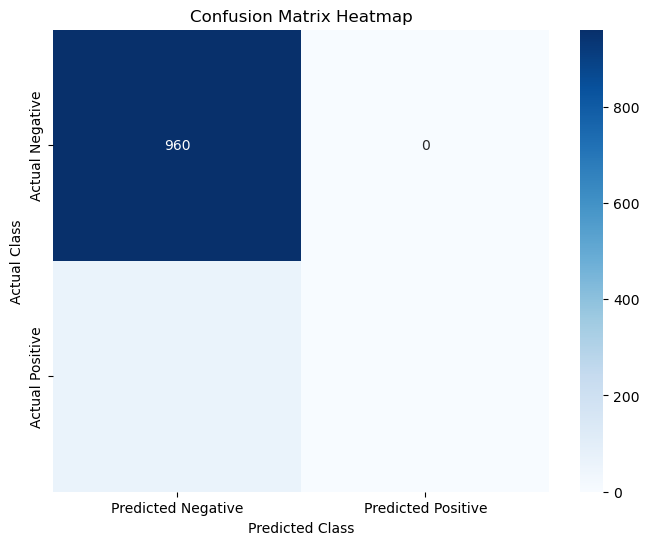

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Model Training using Scikit-Learn
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_class = log_reg.predict(X_test)


# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


##### Classification Report

In [132]:

# Display Classification Report for additional metrics

print("Classification Report:")
print(classification_report(y_test, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\Lbundi\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lbundi\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lbundi\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####  Plot the ROC Curve and Compute AUC

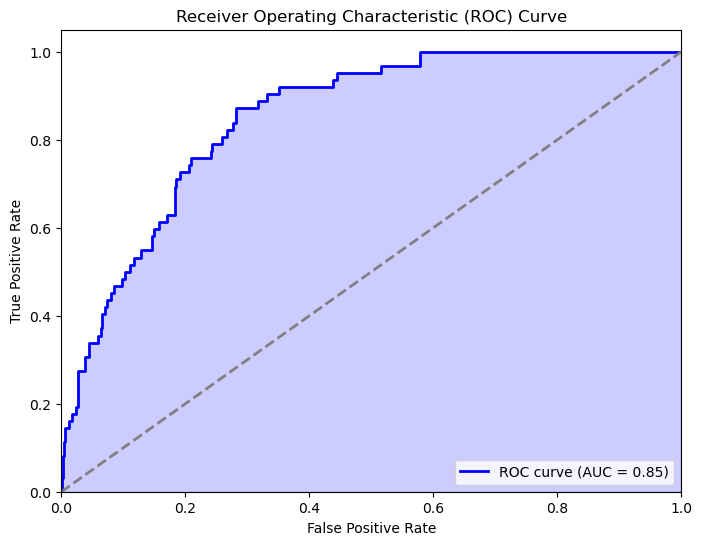

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC Curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve with shaded area
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')              # Shade the area under the curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


- ROC Curve - The ROC curve shows the trade-off between the True Positive Rate (sensitivity) and False Positive Rate (1 - specificity) across different threshold values.

- The AUC value ranges from 0 to 1 A value of 0.5 indicates a model with no discrimination ability (random guessing), while a value of 1.0 indicates perfect classification. Higher AUC values generally indicate better model performance.